In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import re
pd.set_option('display.max_colwidth', -1)

In [2]:
#started with imdb data. the model predicts better on amazon and yelp as opposed to imdb
PATH1, PATH2, PATH3 = 'imdb_labelled.txt', 'amazon_cells_labelled.txt', 'yelp_labelled.txt'
text_label = pd.read_csv(PATH3, delimiter= '\t', header=None)
text_label.columns = ['message', 'Positive'] #score: 1 is positive, 0 is negative

In [3]:
#creating a label list of positive and negative words
keywords_v3 = ['good', 'great', '!!!', 'disappoint', 'bad', 'never', 'wasn\'t', 'but', 'slow', 'not',
              'time', 'back', 'love', 'best', 'enjoy']
for key in keywords_v3:
    text_label[key] = text_label.message.str.contains(key, case=False)

text_label['allcaps'] = text_label.message.str.isupper()

pat = re.compile(r'([a-z])\1\1+')
pat2 = re.compile(r'\b([A-Z])+\b')
text_label['lengthened_words'] = text_label['message'].str.contains(pat)
text_label['word_capitalized'] = text_label['message'].str.contains(pat2)

data = text_label[keywords_v3 + ['allcaps', 'lengthened_words', 'word_capitalized']]
target = text_label['Positive']

C:\Users\sohai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sohai\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if sys.path[0] == '':


In [4]:
#text_label.loc[text_label.Positive==True,'message']

In [5]:
#setting the outcome param to a boolean
text_label['Positive'] = (text_label['Positive']==1)

In [6]:
#get an idea for which words seem to have an impact
for key in keywords_v3:
    print("{} count: {}".format(key, (text_label[key]==True).sum()))

good count: 91
great count: 65
!!! count: 16
disappoint count: 30
bad count: 17
never count: 25
wasn't count: 13
but count: 67
slow count: 10
not count: 132
time count: 58
back count: 61
love count: 36
best count: 29
enjoy count: 11


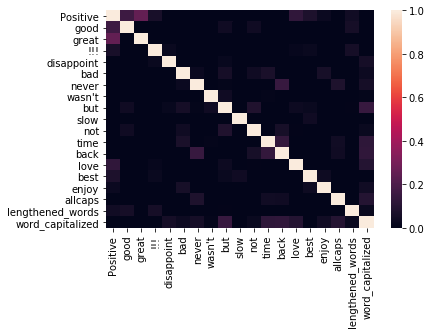

In [7]:
sns.heatmap(text_label.corr(), vmin=0)

In [8]:
#setting up pcs
#df_pca = text_label.loc[:,keywords_v3 + ['allcaps']].dropna()
#X = StandardScaler().fit_transform(df_pca)
#print(X)
#What do the steps below do exactly
#sklearn_pca = PCA(n_components=13)
#learn = sklearn_pca.fit_transform(X)
#feature['new'] = sklearn_pca.explained_variance_ratio_/

In [9]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
#print(text_label.loc[target!=y_pred, 'message'])

Number of mislabeled points out of a total 1000 points : 302


In [10]:
#version 1
conf_mat = confusion_matrix(target, y_pred)
print("Will a movie be rated positive correctly(v3)?\n")
print("Predicted negative correctly: {} Predicted positive when it wasn't: {} \nPredicted negative when it wasnt: {} Predicted positive correctly: {}".format(
    conf_mat[0][0],conf_mat[0][1],conf_mat[1][0],conf_mat[1][1]))
print("False positive rate: {:.2f}".format((conf_mat[0][1]/(target==False).sum())*100))
print("False negative rate: {:.2f}".format((conf_mat[1][0]/(target==False).sum())*100))

Will a movie be rated positive correctly(v3)?

Predicted negative correctly: 318 Predicted positive when it wasn't: 182 
Predicted negative when it wasnt: 120 Predicted positive correctly: 380
False positive rate: 36.40
False negative rate: 24.00


In [11]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))) #score shows the accuracy
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.715
Testing on Sample: 0.698


Version 1:
keywords_v1 = ['best', 'great', 'enjoyable', 'good', 'loved', 'incredible', 'positive', 'funny']

Version 2:
keywords_v2 = ['disappoint', 'bad', 'terrible', 'bland', 'waste', 'low', 'never', 'unfortunate']
Only slightly better than v1

Version 3:
basing on negative notes alone was less accurate than the positive one

Version 4:
tried the lengthened words feature, shows promise

Version 5:
tried the capitalized word feature, boosted it to 70%